# Predicting default on Credit Card Applications for Taiwanese Credit Card Customers

##### Version: 1.1
+ Modifying the iterations to combine the values in pay_0, pay_2, ...., pay_6 (combining values <= 0 as 0 and > 0 as 1)

### Hackathon Date: April 22, 2018 


### GreyAtom Team for Hackathon (Team-3):
+ Prasad
+ Shravani
+ Sagar
+ Amrinder
+ Raviraj
+ Vinayak

### DataSet Reference: 
The <a href="https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients">Defaulters on Credit Card Payment</a> Dataset is taken from UCI Machine learning repository.

### Citation Reference
Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

### Background:
<hr/><span style="color:black; font-family: 'calibri'; font-size: 1.2em;">Taiwanese financial institutions offered credit card to their customers as part of their business growth and business marketing strategy. It was found that the credit card customers have defaulted on their payments. These defaults can pose risks to future of the bank's financial models and growth. The bank has collected some demographical information and also has access to financial information in terms of transactions, amount due etc. along with the whether customer has defaulted or not. With this historical information, bank would like to build model which can help in identifying the patterns and classify if customer will default on his payments given these patterns. These models will identify the defaulters and build proactive risk controls to prevent future losses. More information about this can be found <a href='https://sevenpillarsinstitute.org/case-studies/taiwans-credit-card-crisis'/>here</a></span>

### Business Goal:
<hr/><span style="color:black; font-family: 'calibri'; font-size: 1.2em;">
We need to build a model which will help business 
<ol>
<li>To predict if the customer will default on his payment given the his transactions and demographical information (as described in the Dataset description section.</li>
<li>Analyze which information helps the most in such decision making and in future build some policies around it.</li>
</ol>
<i>There can also be the other factors which are like credit scores, regularities of payment transactions on utility bills, consumer employment rate and market inflations in Taiwan etc. that  may influence or contribute to this analysis and improve the model efficiency.</i></span> 

### Our Approach
<hr/><span style="color:black; font-family: 'calibri'; font-size: 1.2em;">We are using standard approach / steps for any Machine Learning lifecycle project or some of the steps mentioned in  <a href="https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining">CRISP-DM (Cross Industry Standard Process Data Mining)</a> model. 
<ol>
<li>About the dataset</li>
<li>Analyze the dataset and transform it using
<ul>
<li>Exploratory Data Analysis</li>
<li>Feature Engineering</li>
<li>Feature Selection</li>
</ul>
<li>Model Building
<ul>
<li>Logistic Regression (LR)</li>
<li>Decision Tree (DT)</li>
<li>Random Forest (Ensemble of DT)</li>
</ul>
</li>
<li>Performance Evaluation at each step of Model Building</li>
<li>Model Selection</li>
</ol></span>

### Considerations for Model Selection
<hr/><span style="color:black; font-family: 'calibri'; font-size: 1.2em;">Based on the problem statement and goal to be achieved, we need to predict the customer payment defaults in yes or no. This indicates that this is classification problem. We have used classification algorithms such as We will be exploring following performance metrics for a model/models based on following: 
<ol>
<li>Accuracy: Accuracy Score</li>
<li>AUROC Score of the model.</li>
<li>F1 Score.</li>
<li>Precision/Recall Curve</li>
<li>Top feature importances predicted by each model</li>
</ol>
while doing so we will explore several models and try to evaluate the performance each model using these metrics to come up with our suitable recommended model as well as important features/attributes to look at for effectiveness of predictions. The selection of threshold value to decide the decision boundary is based on our intuition. </span>

# Preliminaries

In [166]:
# numpy and pandas imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries for scikit
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,\
                            precision_recall_curve,precision_score,recall_score,roc_auc_score,roc_curve,\
                            matthews_corrcoef, f1_score, make_scorer, auc
from scipy.stats import skew

#  Recursive Feature Elimination
from sklearn.feature_selection import RFE
        
# Python imports
from math import log, sqrt
import re
import collections
import warnings

# decision tree visualization related imports
import pydotplus
import graphviz

from IPython.display import Image

warnings.filterwarnings('ignore')

pd.options.display.max_columns = 400

In [167]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [168]:
%matplotlib inline

# Loading Data set

In [169]:
df_original = pd.read_excel('default of credit card clients.xls',sheetname='Data',header=1,index_col='ID')

In [170]:
df = df_original.copy()

## About DataSet and Some dataset column naming standardizations
+ Column naming standardization (Replacing pay_0 with pay_1 to make it standard with other columns)
+ lower case names for columns (referring to them using column name would make it easy)
+ Dataset - domain information and data type information, interpretations

We lowercase the column name, and rename the column names when required, In particular, remarkably this dataset misses a colum  PAY_1. In the analysis here below we assume that PAY_0 is actually pay_1, to be consider the repayment of the month prior to the month where we calculate the defaulting (which is October 2005, in this particular dataset)

In [171]:
df.columns = [x.lower() for x in df.columns]
df = df.rename(columns={"pay_0": "pay_1","default payment next month":"default_pay"})
cols = df.columns.values
col_names = [str(s) for s in cols]
col_names

['limit_bal',
 'sex',
 'education',
 'marriage',
 'age',
 'pay_1',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'default_pay']

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
limit_bal      30000 non-null int64
sex            30000 non-null int64
education      30000 non-null int64
marriage       30000 non-null int64
age            30000 non-null int64
pay_1          30000 non-null int64
pay_2          30000 non-null int64
pay_3          30000 non-null int64
pay_4          30000 non-null int64
pay_5          30000 non-null int64
pay_6          30000 non-null int64
bill_amt1      30000 non-null int64
bill_amt2      30000 non-null int64
bill_amt3      30000 non-null int64
bill_amt4      30000 non-null int64
bill_amt5      30000 non-null int64
bill_amt6      30000 non-null int64
pay_amt1       30000 non-null int64
pay_amt2       30000 non-null int64
pay_amt3       30000 non-null int64
pay_amt4       30000 non-null int64
pay_amt5       30000 non-null int64
pay_amt6       30000 non-null int64
default_pay    30000 non-null int64
dtypes: int64(24)
memory us

<span style="color:black; font-family: 'calibri'; font-size: 1.2em;">As you can see from the above information, the dataset does not look to have missing values.</b>

In [173]:
print("Explanatory variables:  {}".format(len(df.columns)-1))
print("Number of Observations: {}".format(df.shape[0]))

df['default_pay'] = df['default_pay'].astype('category')

# create a 'target' column for our own convenience
print("Target variable:       '{}' -> '{}'".format('default payment next month', 'default_pay'))

Explanatory variables:  23
Number of Observations: 30000
Target variable:       'default payment next month' -> 'default_pay'


### DataSet description
<span style="color:black; font-family: 'calibri'; font-size: 1.2em;">This study leverages following 
+ <b>Dependent Variable</b>  : default payment (Yes = 1, No = 0), as the response variable
+ <b>Independent Variable</b>: 23 variables as explanatory variables and they are numeric. These are as follows : 
    
```
   ----------------------------------------------------------------------------------------------------------------------
   Name                   Numeric / Categorical          Explantion        
   ----------------------------------------------------------------------------------------------------------------------
   limit_bal              Numeric                        Amount of the given credit (NT dollar): 
                                                         it includes both the individual consumer credit 
                                                         and his/her family (supplementary) credit.
   
   sex                    Categorical                    Gender 
                                                         (1 = male; 2 = female)
   
   education              Categorical                  Education
                                                       (1 = graduate school; 2 = university; 3 = high school; 4 = others)
   
   marriage               Categorical                    Marital status 
                                                         (1 = married; 2 = single; 3 = others)
   
   age                    Numeric                        Age (years)
   
   pay_0 - pay_6          Numeric                        History of past payment. Past monthly payment records 
                                                         From April to September, 2005 as follows:
                        
                                                         pay_0 = the repayment status in September, 2005
                                                         pay_2 = the repayment status in August, 2005
                                                         ...
                                                         pay_6 = the repayment status in April, 2005 
                        
                                                         The measurement scale for the repayment status is: 
                                                         -1 = pay duly; 
                                                         1 = payment delay for one month 
                                                         2 = payment delay for two months
                                                         ...
                                                         8 = payment delay for eight months 
                                                         9 = payment delay for nine months and above
                        
   bill_amt1-bill_amt5    Numeric                        Amount of bill statement (NT dollar). 
                                                         bill_amt1 = amount of bill statement in September, 2005 
                                                         bill_amt2 = amount of bill statement in August, 2005
                                                         ...
                                                         bill_amt6= amount of bill statement in April, 2005 
                        
   pay_amt1-pay_amt6      Numeric                        Amount of previous payment (NT dollar)
                                                         pay_amt1 = amount paid in September, 2005
                                                         pay_amt2 = amount paid in August, 2005
                                                         ...
                                                         pay_amt6 = amount paid in April, 2005 
   ----------------------------------------------------------------------------------------------------------------------
```
</span>

In [174]:
df.head(5)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_pay
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


***

## Some initializations and reusable methods block

Collect all the mertics at one place for all the models used during training. This will help in comarison of these metrics.

In [175]:
# commonly used variables
pay_status_columns = []
for x in range(1,7): pay_status_columns.append("pay_"+ str(x))
    
bill_amt_columns = []
for x in range(1,7): bill_amt_columns.append("bill_amt"+ str(x))
    
pay_amt_columns = []
for x in range(1,7): pay_amt_columns.append("pay_amt"+ str(x))


# initialization block for ML
perf_metrics = ['Model','Model_Desc','TP','FP','FN','TN','AUC',\
                'Accuracy_Score','Precision','Recall',\
                'Train_score', 'Test_score', 'F1_Score', 'Matt_Coeff']
df_all_models = pd.DataFrame(columns=perf_metrics)
perf_metric_per_model = {}

In [176]:
# This is only required during model building exercise
# for model evaluation
# Get the performance metrics for the models
def save_performance_metrics(model, model_name, model_dsc, X_test, y_test, X_train=None, y_train=None):
    # nested inner method for adding performance metric
    def add_perf_metric_to_compare(perf_metric_per_model):
        global df_all_models
        model_name = perf_metric_per_model['Model']
        # if model data already exists then drop those rows
        if df_all_models[df_all_models['Model'] == model_name].shape[0] >= 1:
            ind = df_all_models[df_all_models['Model']== model_name].index
            df_all_models.drop(ind, inplace=True)
        s1 = pd.Series(perf_metric_per_model, perf_metric_per_model.keys())
        df_all_models = df_all_models.append(s1, ignore_index=True)    
    
    perf_metric_per_model = {}
#     print "Evaluating performance for {} description is {}"\
#                                         .format(model_name,model_description)
    perf_metric_per_model['Model'] = model_name
    perf_metric_per_model['Model_Desc'] = model_dsc
    y_pred = model.predict(X_test)
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    tn, fp, fn, tp = conf_mat.ravel()
    perf_metric_per_model['TP'], perf_metric_per_model['FP'] = tp, fp
    perf_metric_per_model['FN'], perf_metric_per_model['TN'] = fn, tn
    perf_metric_per_model['AP'], perf_metric_per_model['AN'] = tp+fn, fp+tn
    perf_metric_per_model['AUC'] = roc_auc_score(y_test, y_pred)
    perf_metric_per_model['F1_Score'] = f1_score(y_test, y_pred)
    perf_metric_per_model['Accuracy_Score'] = accuracy_score(y_test, y_pred)
    perf_metric_per_model['Precision'] = precision_score(y_test, y_pred)
    perf_metric_per_model['Recall'] = recall_score(y_test, y_pred) 
    perf_metric_per_model['Train_score'] = model.score(X_train, y_train)    
    perf_metric_per_model['Test_score'] = model.score(X_test, y_test)    
    perf_metric_per_model['Matt_Coeff'] = matthews_corrcoef(y_test, y_pred)
    s2 = pd.Series(perf_metric_per_model, index=perf_metric_per_model.keys())
    df_metric = pd.DataFrame(data=[s2], columns=perf_metrics)
    add_perf_metric_to_compare(perf_metric_per_model)
    return df_metric
    
# plot feature importances
# not applicable to Logistic Regression
def plot_feature_importance(model_name, importances, columns):
    # feature importances
    plt.figure(figsize=(12,6))
    indices = np.argsort(importances)[::-1]
    indices = indices[:10]
    plt.title('Top 10 Feature Importances by {}'.format(model_name))
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), columns[indices])
    plt.xlabel('Relative Importance')
    plt.show()

# plot ROC and Precision, Recall curve
def plot_roc_and_precision(model_name, model, X_test, y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    # AUC under ROC Curve 
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.title('Receiver Operating Characteristic for {}'.format(model_name))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('TPR (Recall or Sensitivity)')
    plt.xlabel('FPR (1-Specificity)')
    
    # precision and recall curve
    plt.subplot(122)
    precision, recall, thresholds = precision_recall_curve(y_test, preds)
    plt.step(recall, precision, color='b', alpha=0.1,
         where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve for {}'.format(model_name))
    
    plt.tight_layout(pad=4.0, w_pad=0.5, h_pad=1.0)    
    plt.show()
    
def CMatrix(CM,labels=['pay','default']):
    df1 = pd.DataFrame(data=CM,index=labels,columns=labels)
    df1.index.name = 'Actual'
    df1.columns.name = 'Predicted'
    df1.loc['Total'] = df1.sum()
    df1['Total'] = df1.sum(axis=1)
    return df1

# EDA

## Information related to Credit Limit, Payment Status, Bill Amount and Bill Payment
We will look at how payment status, bill amount and bill payment columns look like.

Class Statistics on entire data 30000:


,Count,Percent Split
Not Default,23364,77.88
Default,6636,22.12


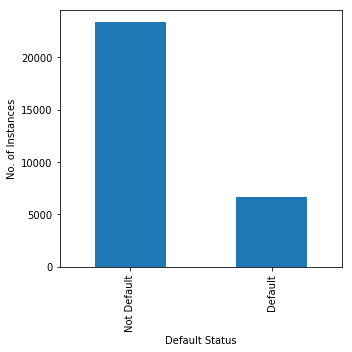

In [177]:
total_cnt = df.shape[0]
print 'Class Statistics on entire data {}:'.format(total_cnt)
cls_cnt = df['default_pay'].value_counts()
cls_stats = pd.DataFrame ({"Count": [cls_cnt[0], cls_cnt[1]],\
                        "Percent Split" : [((cls_cnt[0] * 100.0) /total_cnt), ((cls_cnt[1] * 100.0) /total_cnt)]},
                         index=["Not Default", "Default"])
display(cls_stats)
plt.figure(figsize=(5,5))
ax = cls_cnt.plot(kind='bar')
ax.set_xlabel("Default Status")
ax.set_ylabel("No. of Instances")
ax.set_xticklabels(['Not Default', 'Default'])
#     for p in ax.patches:
#         ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+300))
plt.tight_layout()
plt.show()

## Information related to Credit Limit, Payment Status, Bill Amount and Bill Payment
We will look at how payment status, bill amount and bill payment columns look like.

In [178]:
df[pay_status_columns].head(10)

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
ID,,,,,,
1,2,2,-1,-1,-2,-2
2,-1,2,0,0,0,2
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,-1,0,-1,0,0,0
6,0,0,0,0,0,0
7,0,0,0,0,0,0
8,0,-1,-1,0,0,-1
9,0,0,2,0,0,0


In [179]:
print 'Paid Amount Columns'
display(df[pay_amt_columns].head(10))
print ('==')*10
print '\nPaid Amount Columns Statistics'
display(df[pay_amt_columns].describe())

Paid Amount Columns


,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
ID,,,,,,
1,0,689,0,0,0,0
2,0,1000,1000,1000,0,2000
3,1518,1500,1000,1000,1000,5000
4,2000,2019,1200,1100,1069,1000
5,2000,36681,10000,9000,689,679
6,2500,1815,657,1000,1000,800
7,55000,40000,38000,20239,13750,13770
8,380,601,0,581,1687,1542
9,3329,0,432,1000,1000,1000



Paid Amount Columns Statistics


,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [180]:
print 'Bill Amount Columns'
display(df[bill_amt_columns].head(10))
print ('==')*10
print '\nBill Amount Columns Statistics'
display(df[bill_amt_columns].describe())

Bill Amount Columns


,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
ID,,,,,,
1,3913,3102,689,0,0,0
2,2682,1725,2682,3272,3455,3261
3,29239,14027,13559,14331,14948,15549
4,46990,48233,49291,28314,28959,29547
5,8617,5670,35835,20940,19146,19131
6,64400,57069,57608,19394,19619,20024
7,367965,412023,445007,542653,483003,473944
8,11876,380,601,221,-159,567
9,11285,14096,12108,12211,11793,3719



Bill Amount Columns Statistics


,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [181]:
df['limit_bal'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: limit_bal, dtype: float64

In [182]:
df_t = df.copy()

In [183]:
df_pay = pd.DataFrame(columns=['credit_assigned', 'total_bill','average_bill', 'total_payment', \
                               'average_payment', 'amt_owed','amt_owed_more_thn_credit','default_status',
                              'adv_pay', 'min_pay', 'delay_pay'])
df_pay['credit_assigned'] = df['limit_bal']
df_pay['total_bill'] = df[bill_amt_columns].sum(axis=1)
df_pay['average_bill'] = df[bill_amt_columns].mean(axis=1)
df_pay['total_payment'] = df[pay_amt_columns].sum(axis=1)
df_pay['average_payment'] = df[pay_amt_columns].mean(axis=1)
df_pay['amt_owed'] = df_pay['total_bill'] - df_pay['total_payment']


df_pay['amt_owed_more_thn_credit'] = np.where(
    (df_pay['credit_assigned'] - df_pay['amt_owed']) > 0,\
    0, 1)

df_5 = df[pay_status_columns]
df_pay['adv_pay'] = df_5[df_5 < 0 ].count(axis=1)
df_pay['min_pay'] = df_5[df_5 == 0 ].count(axis=1)
df_pay['delay_pay'] = df_5[df_5 > 0 ].count(axis=1)
df_pay['default_status'] = df['default_pay']
display(df_pay.head(10))

,credit_assigned,total_bill,average_bill,total_payment,average_payment,amt_owed,amt_owed_more_thn_credit,default_status,adv_pay,min_pay,delay_pay
ID,,,,,,,,,,,
1,20000,7704,1284.000000,689,114.833333,7015,0,1,4,0,2
2,120000,17077,2846.166667,5000,833.333333,12077,0,1,1,3,2
3,90000,101653,16942.166667,11018,1836.333333,90635,1,0,0,6,0
4,50000,231334,38555.666667,8388,1398.000000,222946,1,0,0,6,0
5,50000,109339,18223.166667,59049,9841.500000,50290,1,0,2,4,0
6,50000,238114,39685.666667,7772,1295.333333,230342,1,0,0,6,0
7,500000,2724595,454099.166667,180759,30126.500000,2543836,1,0,0,6,0
8,100000,13486,2247.666667,4791,798.500000,8695,0,0,3,3,0
9,140000,65212,10868.666667,6761,1126.833333,58451,0,0,0,5,1


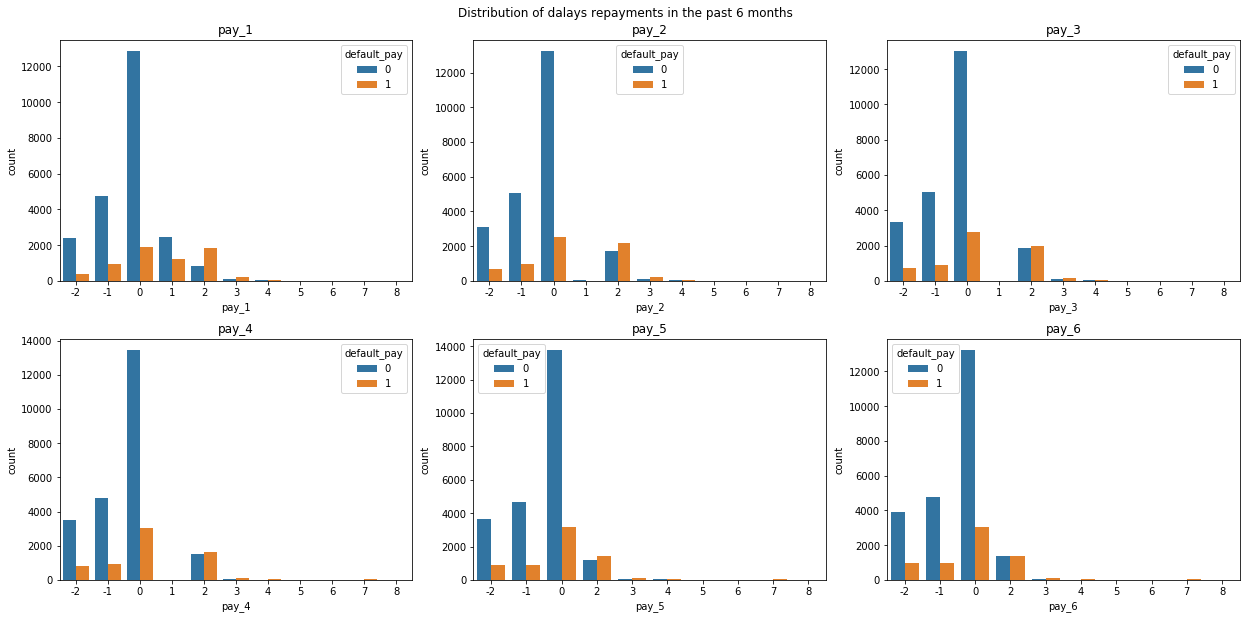

In [184]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(18,9)
fig.suptitle('Distribution of dalays repayments in the past 6 months')
for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3
    sns.countplot(x=pay_status_columns[i], hue="default_pay", data=df, ax=ax[row,col])
    ax[row,col].set_title(pay_status_columns[i])

plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

In [185]:
cols_to_drop = ['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6','sex','education','marriage','default_pay']
df_tmp = df.drop(labels=cols_to_drop,axis=1)
df_tmp.describe()


,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [186]:
lst = list(pay_amt_columns)
lst.extend(bill_amt_columns)
lst.extend(['limit_bal','age','default_pay'])

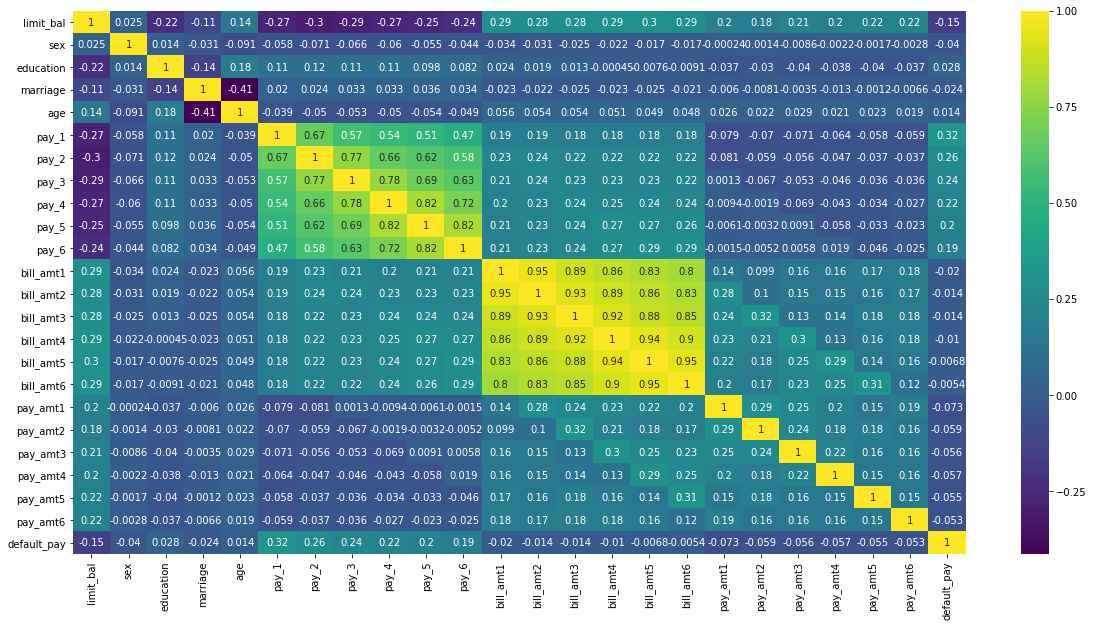

In [187]:
df_corr = df.copy()
df_corr['default_pay'] = df_original['default payment next month']
#correlation matrix
cm = df_corr.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [188]:
print 'Marriage:  ', pd.unique(df['marriage'])
print 'Education: ', pd.unique(df['education'])
print 'Sex:       ', pd.unique(df['sex'])

Marriage:   [1 2 3 0]
Education:  [2 1 3 5 4 6 0]
Sex:        [2 1]


As per documentation of the dataset, for education, we only have following<br/>
1 = graduate school; 2 = university; 3 = high school; 4 = others<br/>
We will replace 0,5,6 with 'others'

### Exploring Categorical Variables

In [189]:
df['sex'] = df['sex'].astype('category').cat.rename_categories(['M', 'F'])
df['marriage'] = df['marriage'].astype('category').cat.rename_categories(['na','married', 'single', 'other'])
df['education'] = df['education'].astype('category').cat.rename_categories(['na','grad_school','university', 'high_school', 'others','unknown1','unknown2'])
df['age_cat'] = pd.cut(df['age'], range(0, 100, 10), right=False)
for i in pay_status_columns:
    df[i] = df[i].astype('category')

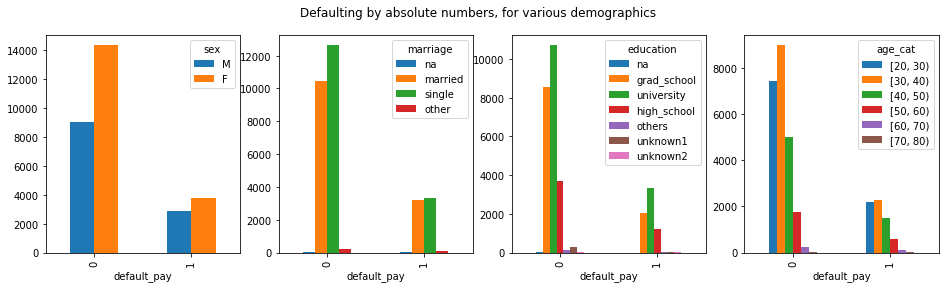

In [190]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches(16,4)
fig.suptitle('Defaulting by absolute numbers, for various demographics')

d = df.groupby(['default_pay', 'sex']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0])

d = df.groupby(['default_pay', 'marriage']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1])

d = df.groupby(['default_pay', 'education']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2])

d = df.groupby(['default_pay', 'age_cat']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[3])

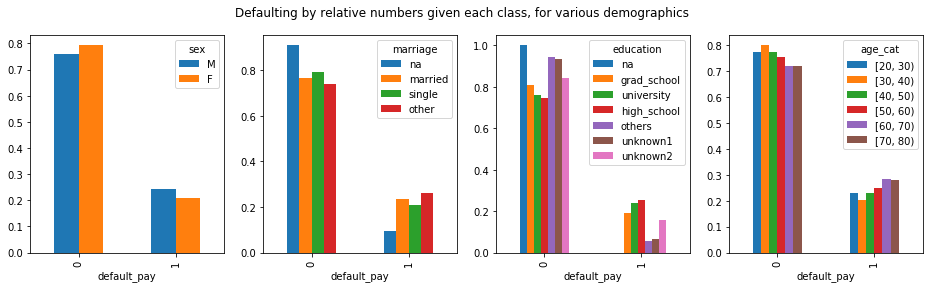

In [191]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches(16,4)
fig.suptitle('Defaulting by relative numbers given each class, for various demographics')

d = df.groupby(['default_pay', 'sex']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[0])

d = df.groupby(['default_pay', 'marriage']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[1])

d = df.groupby(['default_pay', 'education']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[2])

d = df.groupby(['default_pay', 'age_cat']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[3])

As we can see from the above graph, 
+ Distribution of Gender: 
    - Female credit card holders are more compared to Male
    - Female defaulters are more compared to Male
+ Distribution of Marriage: 
    - Single are holding more credit cards compared to Married and Others
    - Within defaulters Marital status with Others is very minimal. Married and Single have same number of defaulters
+ Distribution of Education:
    - University education has more credit crds. People with education values as Graduate and University have more credit cards.   
+ Distribution by Age:
    - Age 30 to 40 have more credit cards followed by Age 20 to 30.
    - Age 60 to 70 and Age 70 to 80 have very less credit card holders
    - Age 20 to 30 and 30 to 40 have more defaulters

Skewness on limit_bal is :  0.992817316482


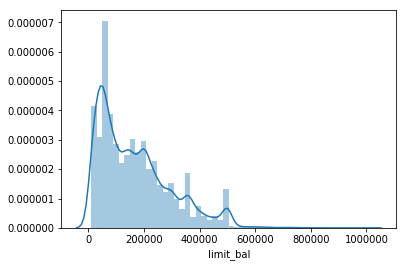

In [192]:
# Credit limit distribution
sns.distplot(df['limit_bal'],kde=True)
print 'Skewness on limit_bal is : ',skew(df['limit_bal'])

Skewness for limit_bal after log transformation is :  -0.513433918417


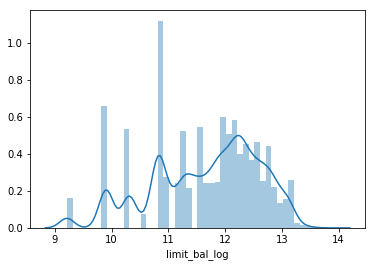

In [193]:
df_tmp1['limit_bal_log'] = df_tmp1['limit_bal'].apply(np.log)
sns.distplot(df_tmp1['limit_bal_log'],kde=True)
print 'Skewness for limit_bal after log transformation is : ', skew(df_tmp1['limit_bal_log'])

***

# Feature Engineering

### Label Encoding

In [194]:
df['grad_school'] = (df['education']==1).astype('int')
df['university'] = (df['education']==2).astype('int')
df['high_school']= (df['education']==3).astype('int')
df['others']= (df['education']==4).astype('int')
df['others']= (df['education']==5).astype('int')
df['others']= (df['education']==6).astype('int')
df['others']= (df['education']==0).astype('int')
df.drop('education',axis=1,inplace=True)

In [195]:
df['male'] = (df['sex']=='M').astype('int')
df.drop('sex',axis=1,inplace=True)


df['married'] = (df['marriage']==1).astype('int')
df['single'] = (df['marriage']==2).astype('int')
df['na'] = (df['marriage']==3).astype('int')
df['na'] = (df['marriage']==0).astype('int')
df.drop(['marriage','age_cat'],axis=1,inplace=True)

# Since 0 is labeled as 'pay duly', every negative value should be seen as 0.
for i in pay_status_columns:
    df[i].replace({-2:-1,-1:-1},inplace=True)
 
df.head()

,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_pay,grad_school,university,high_school,others,male,married,single,na
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,24,2,2,-1,-1,-1,-1,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,0,0,0,0
2,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,0,0,0,0
3,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,0,0,0,0,0,0
4,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,0,0,0,0,0,0
5,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,0,0,1,0,0,0


In [196]:
# # log of payments
# for i in np.arange(1,7):
#     df['pay_amt_log'+str(i)] = df['pay_amt'+str(i)].apply(lambda x: log(x+1) if x>0 else 0)
#     df.drop(labels=['pay_amt'+str(i)], axis=1, inplace=True)
    
# # log of bill amounts
# for i in np.arange(1,7):
#     df['bill_amt_log'+str(i)] = df['bill_amt'+str(i)].apply(lambda x: log(x+1) if x>0 else 0)
#     df.drop(labels=['bill_amt'+str(i)], axis=1, inplace=True)

# df['limit_bal_log'] = df['limit_bal'].apply(lambda x: log(x))
# # sns.distplot(a=df['limit_bal'], color='b')
# df.drop(labels=['limit_bal'],axis=1, inplace=True)
# # sns.distplot(a=df_11['limit_bal_log'], color='b')
# # display(df_11.head(5))

## Standardization

In [197]:
#Scaling
scale = ['limit_bal','bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6','pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
robust_scaler = RobustScaler()
df.loc[:,scale] = robust_scaler.fit_transform(df.loc[:,scale])

# df.head()

In [198]:
col_values = df.columns.values
print type(col_values)
out = np.delete(col_values, np.where(col_values == 'default'))
col_values = out 
print col_values

<type 'numpy.ndarray'>
[u'limit_bal' u'age' 'pay_1' u'pay_2' u'pay_3' u'pay_4' u'pay_5' u'pay_6'
 u'bill_amt1' u'bill_amt2' u'bill_amt3' u'bill_amt4' u'bill_amt5'
 u'bill_amt6' u'pay_amt1' u'pay_amt2' u'pay_amt3' u'pay_amt4' u'pay_amt5'
 u'pay_amt6' 'default_pay' 'grad_school' 'university' 'high_school'
 'others' 'male' 'married' 'single' 'na']


## Feature Selection

### _Method 1_  : RFE - wrapper method

In [199]:
lr = LogisticRegression(random_state=9)
dt = DecisionTreeClassifier(random_state=9)
rf = RandomForestClassifier(random_state=9)
X = df.drop('default_pay',axis=1)
y = df['default_pay']
# create the RFE model and select 3 attributes
rfe = RFE(lr, 10)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
#print(rfe.support_)
print(rfe.ranking_)

[ 1 10  1  1  1  3  1  2  1  1  1  6  5 12  1  4 11  7  8  9 16 14 15 13  1
 17 18 19]


In [200]:
from sklearn.model_selection import cross_val_score,KFold
# evaluate each model in turn
results = []
names = []
X = df.iloc[:,[0,2,3,4,6,10,8,9,14,24]]
y = df.default_pay
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=9,test_size=.2)

# for name, model in :
kfold = KFold(n_splits=5)
cv_results = cross_val_score(lr, X_train, y_train, cv=kfold, scoring='accuracy')
print cv_results.mean()

0.813708333333


In [201]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=9, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [202]:
y_pred = lr.predict(X_test)
model = lr
model_name = 'ITR1: Logistic Regression (post RFE)'
model_description = 'ITR1: Logistic Regression (with RFE)'
df_metric = save_performance_metrics(model, model_name, model_description, X_test, y_test, X_train, y_train)
# display(CMatrix(CM))
# display(df_metric)
# plot_roc_and_precision(model_name, model, X_test, y_test)

In [203]:
# tn, fp, fn, tp = confusion_matrix(y_true=y_test,y_pred=y_pred)

print (classification_report(y_true=y_test,y_pred=y_pred))
train_score, test_score = lr.score(X_train, y_train), lr.score(X_test, y_test)
print 'Train score {} and Test score {}'.format(train_score, test_score)
from sklearn.metrics import matthews_corrcoef
print matthews_corrcoef(y_true=y_test,y_pred=y_pred)
tn, fp, fn, tp = confusion_matrix(y_true=y_test,y_pred=y_pred).ravel()
print ("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print roc_auc_score(y_true=y_test,y_score=y_pred)

# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=9, kind="borderline2")
# X_sample, y_sample = smote.fit_sample(X_train, y_train)
# # sns.countplot(y_sample)
# lr.fit(X_sample, y_sample)
# y_pred = lr.predict_proba(X_test)
# # print (classification_report(y_true=y_test,y_pred=y_pred))
# # train_score, test_score = lr.score(X_train, y_train), lr.score(X_test, y_test)
# # print 'Train score {} and Test score {}'.format(train_score, test_score)
# matthews_corrcoef(y_true=y_test,y_pred=y_pred)
# # tn, fp, fn, tp = confusion_matrix(y_true=y_test,y_pred=y_pred).ravel()
# # (tn, fp, fn, tp)

# precision_recall_curve(y_true=y_test,y_pred=y_pred)


             precision    recall  f1-score   support

          0       0.83      0.96      0.89      4678
          1       0.70      0.28      0.40      1322

avg / total       0.80      0.81      0.78      6000

Train score 0.813541666667 and Test score 0.814666666667
0.359552629777

 TN: 4514 FP: 164 FN: 948 TP: 374 

0.623923486445


In [204]:
#Stcaking Ensemble
X = df.iloc[:,[0,2,1,10,8,9,11,12,13,15]]
y = df['default_pay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=9)
X_train1, X_test1, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.2, random_state=9)

M1 = LogisticRegression()
M2 = DecisionTreeClassifier(max_depth=1,criterion='entropy')
M3 = DecisionTreeClassifier(max_depth=2,criterion='entropy')
M4 = DecisionTreeClassifier(max_depth=1,criterion='entropy')
M5 = DecisionTreeClassifier(max_depth=1,criterion='entropy')



M1.fit(X_train1,y_train2)
M2.fit(X_train1,y_train2)
M3.fit(X_train1,y_train2)
M4.fit(X_train1,y_train2)
M5.fit(X_train1,y_train2)


pred1 = M1.predict_proba(X_test1)
pred2 = M2.predict_proba(X_test1)
pred3 = M3.predict_proba(X_test1)
pred4 = M4.predict_proba(X_test1)
pred5 = M5.predict_proba(X_test1)


A = pd.DataFrame(pred1)[1]
B = pd.DataFrame(pred2)[1]
C = pd.DataFrame(pred3)[1]
D = pd.DataFrame(pred4)[1]
E = pd.DataFrame(pred5)[1]

X_meta = pd.concat([A,B,C,D,E],axis=1)

meta_classifier = RandomForestClassifier(max_depth=2,n_estimators=100)
meta_classifier.fit(X_meta,y_test2)


pred6 = M1.predict_proba(X_test)
pred7 = M2.predict_proba(X_test)
pred8 = M3.predict_proba(X_test)
pred9 = M4.predict_proba(X_test)
pred10 = M5.predict_proba(X_test)


F = pd.DataFrame(pred6)[1]
G = pd.DataFrame(pred7)[1]
H = pd.DataFrame(pred8)[1]
I = pd.DataFrame(pred9)[1]
J = pd.DataFrame(pred10)[1]

K = pd.concat([F,G,H,I,J], axis=1)
y_meta = meta_classifier.predict(K)
auc = roc_auc_score(y_meta,y_test)
auc

0.74554560012998539

In [205]:
print (classification_report(y_meta,y_test))
# train_score, test_score = lr.score(X_train, y_train), lr.score(X_test, y_test)
# print 'Train score {} and Test score {}'.format(train_score, test_score)
# from sklearn.metrics import matthews_corrcoef
print matthews_corrcoef(y_meta,y_test)
tn, fp, fn, tp = confusion_matrix(y_meta,y_test).ravel()
print ("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print accuracy_score(y_meta,y_test)

             precision    recall  f1-score   support

          0       0.96      0.84      0.89      2699
          1       0.31      0.65      0.42       301

avg / total       0.89      0.82      0.84      3000

0.360575783826

 TN: 2258 FP: 441 FN: 104 TP: 197 

0.818333333333


### _Method 2  : f_classif_

In [206]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif,mutual_info_classif

### _Method 3: Feature selection with correlation and random forest classification_

In [207]:
# x1 = df.drop(['bill_amt2','default_pay'],axis=1)
# split data train 70 % and test 30 %
# y = df.default_pay
# x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=42)

# #random forest classifier with n_estimators=10 (default)
# clf_rf = RandomForestClassifier(random_state=43)      
# clr_rf = clf_rf.fit(x_train,y_train)

# ac = accuracy_score(y_test,clf_rf.predict(x_test))
# print('Accuracy is: ',ac)
# cm = confusion_matrix(y_test,clf_rf.predict(x_test))
# sns.heatmap(cm,annot=True,fmt="d")

In [208]:
# x = df.drop('default_pay',axis=1)
# y = df.default_pay
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
# print('Score list:', select_feature.scores_)
# print('Feature list:', x_train.columns)

### _Method 3: PCA_

In [209]:
from sklearn.preprocessing import scale
from sklearn.feature_selection import chi2,f_classif,SelectKBest
from sklearn.decomposition import PCA
#converting dataframe into numpy Array
X = df.drop('default_pay',axis=1)
Y = df.default_pay

# Split-out validation dataset
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=9, kind="borderline2")
# X_sample, y_sample = smote.fit_sample(X_train, y_train)
# sns.countplot(y_sample)
# lr.fit(X_sample, y_sample)
# y_pred = lr.predict_proba(X_test)
# print (classification_report(y_true=y_test,y_pred=y_pred))
# train_score, test_score = lr.score(X_train, y_train), lr.score(X_test, y_test)
# print 'Train score {} and Test score {}'.format(train_score, test_score)
# matthews_corrcoef(y_true=y_test,y_pred=y_pred)
# tn, fp, fn, tp = confusion_matrix(y_true=y_test,y_pred=y_pred).ravel()
# (tn, fp, fn, tp)

# precision_recall_curve(y_true=y_test,y_pred=y_pred)

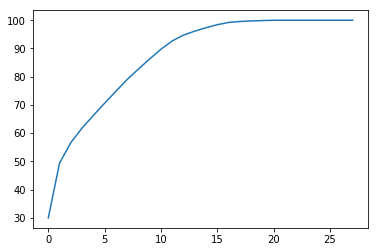

In [210]:
#Scaling the values
X_t = scale(X_train)

#initially lets create 28 components which is actual number of Variables we have
pca = PCA(n_components=28)

pca.fit(X_t)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#lets see Cumulative Variance plot
plt.plot(var1)

In [211]:
#Looking at above plot I'm taking 16 variables
# pca = PCA(n_components=16)
# pca.fit(X_t)
X_train_PC=pca.fit_transform(X_t)
# X_train_PC = X_train_PC[:,:16]

In [212]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [213]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(random_state=9)))
models.append(('RF2', RandomForestClassifier(random_state=9)))
models.append(('DT', DecisionTreeClassifier(random_state=9)))

from sklearn.model_selection import cross_val_score,KFold
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train_PC, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.813708 (0.009183)
RF2: 0.804125 (0.009114)
DT: 0.730250 (0.007670)


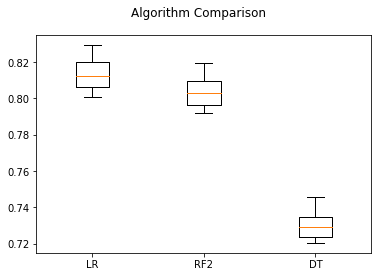

In [214]:
# Comparing Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

#Scaling the X_validation data
X_v = scale(X_validation)

pca.fit(X_v)
X_validation_PC=pca.fit_transform(X_v)

In [215]:
# Make predictions on validation dataset by choosing best Algorithm
lr = LogisticRegression(random_state=9)
lr.fit(X_train_PC, Y_train)
predictions = lr.predict(X_validation_PC)
print("Accuracy : ", accuracy_score(Y_validation, predictions))
tn, fp, fn, tp = confusion_matrix(Y_validation, predictions)
print ("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print(classification_report(Y_validation, predictions))
print (matthews_corrcoef(Y_validation, predictions))
train_score, test_score = lr.score(X_train_PC, Y_train), lr.score(X_validation_PC, Y_validation)
print 'Train score {} and Test score {}'.format(train_score, test_score)
print roc_auc_score(Y_validation, predictions)

('Accuracy : ', 0.75666666666666671)


ValueError: need more than 2 values to unpack

### _Method : Select From Model_

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
X = df.drop('default_pay',axis=1)
y = df.default_pay
print('Before');
print(X.shape)

clf = RandomForestClassifier()
clf.fit(X, y)

print('\nFeature Importance');
print(clf.feature_importances_)

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

print('\nAfter'); 
print(X_new.shape)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.20, random_state=42)
smote = SMOTE(random_state=9, kind="borderline2")
X_sample, y_sample = smote.fit_sample(X_train, y_train)
clf.fit(X_sample, y_sample)
y_pred = clf.predict(X_test)
print (classification_report(y_true=y_test,y_pred=y_pred))
# train_score, test_score = lr.score(X_train, y_train), lr.score(X_test, y_test)
# print 'Train score {} and Test score {}'.format(train_score, test_score)
print matthews_corrcoef(y_true=y_test,y_pred=y_pred)
tn, fp, fn, tp = confusion_matrix(y_true=y_test,y_pred=y_pred).ravel()
print ("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print roc_auc_score(y_true=y_test,y_score=y_pred)

# # Build a forest and compute the feature importances
# forest = ExtraTreesClassifier(n_estimators=250,
#                               random_state=0)

# forest.fit(X, y)
# importances = forest.feature_importances_
# print importances
# std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
# print std

# indices = np.argsort(importances)[::-1]
# print indices

# # Print the feature ranking
# print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# # Plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(X.shape[1]), importances[indices],
#        color="r", yerr=std[indices], align="center")
# plt.xticks(range(X.shape[1]), indices)
# plt.xlim([-1, X.shape[1]])   

***